In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import collections
import ast
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
title_fontsize = 15

In [3]:
tweets = pd.read_csv('./data/large_datafiles/all_tweets_2015_2022.csv', 
                     parse_dates=['Date'], index_col=['Unnamed: 0'])

,Date,Content,ticker
4416820,2022-09-29 10:18:43,Stocks I think entering intriguing levels to a...,ZS
4416821,2022-09-28 13:47:08,Update: Probably my final buys this year unles...,ZS
4416822,2022-09-27 20:00:00,More reasons cybersecurity stocks have been re...,ZS
4416823,2022-09-21 06:02:38,Investing 2022.\n\nDoesn't matter if you have ...,ZS
4416824,2022-09-18 16:37:22,Zscaler stock popped over 20% after their Q4 e...,ZS
...,...,...,...
4579308,2015-01-09 14:03:50,@zs@pnp_pro9 @ZsppoPcr @zsppo conducted visita...,ZS
4579309,2015-01-09 04:15:07,Al @zs zeynepsu,ZS
4579310,2015-01-06 12:24:25,Opportunities for Front End Developers @ZS ZS ...,ZS
4579311,2015-01-05 16:19:58,@Kungsfiskarens Sorry but that's not what we d...,ZS


In [6]:
tweets['Lemmatized_tokens'] = tweets['Lemmatized_tokens'].apply(lambda x: ast.literal_eval(x))
tweets.to_csv('./data/tweets_cleaned_tokenized_words.csv')

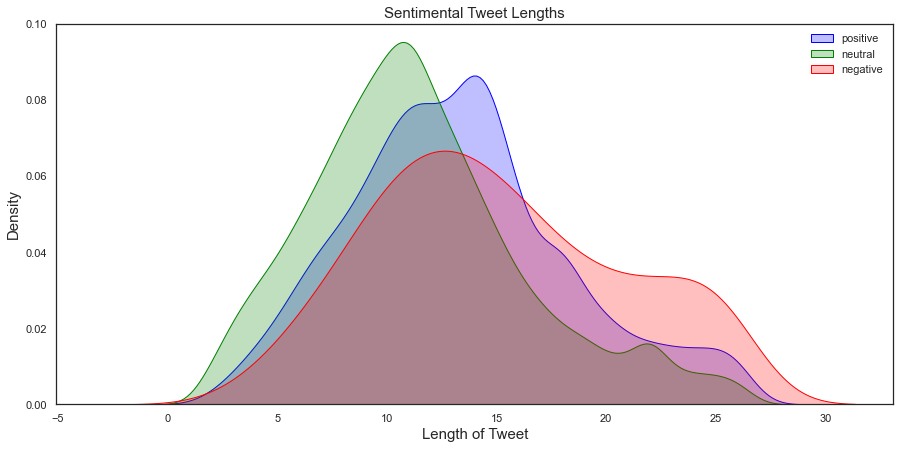

In [113]:
labels = ['positive', 'neutral', 'negative']
colors = ['blue', 'green', 'red']

for label, color in zip(labels, colors):
    data = tweets[tweets['label'] == label]
    sns.kdeplot(data['word_length'], shade=True, label=label, color=color, bw_adjust=3)

plt.xlabel('Length of Tweet', fontsize=title_fontsize)
plt.ylabel('Density', fontsize=title_fontsize)
plt.title('Sentimental Tweet Lengths', fontsize=title_fontsize)

plt.legend(labels, frameon=False)
plt.savefig('./visualization/Sentimental_Tweet_Lengths.png', dpi = 600)
plt.show()

In [238]:
lemmatized_tokens = list(tweets['Lemmatized_tokens'])
tokens_list = list(itertools.chain(*lemmatized_tokens))
counts = collections.Counter(tokens_list)
clean_tweets = pd.DataFrame(counts.most_common(21),
                           columns = ['words', 'counts'])

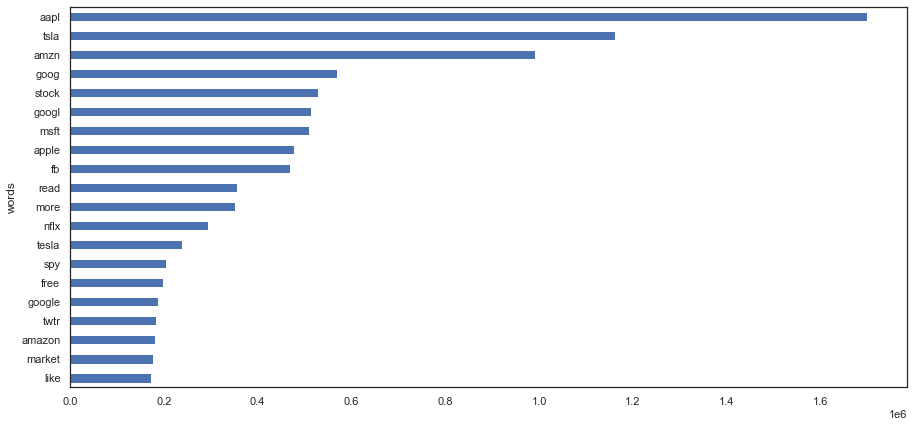

In [182]:
clean_tweets.drop(4).sort_values('counts').plot.barh(x='words', y='counts', legend=False)
plt.savefig('./visualization/20 most common words.png', dpi = 600)

In [9]:
lemmatized_tokens = list(tweets['Lemmatized_tokens'])
tokens_list = list(itertools.chain(*lemmatized_tokens))

In [11]:
words = [x for x in tokens_list if not re.search('…|“', x)]

df = pd.DataFrame(words)

In [13]:
pd.read_csv('./data/all_words_split.csv')

In [ ]:
words = ' '.join([x for x in tokens_list if not re.search('…|“', x)])
words

In [219]:
wordcloud = WordCloud(width=1200, height=800,
                      background_color='white',
                      stopwords = stopwords.words('english'),
                      min_font_size=10).generate(str(words))

SyntaxError: invalid syntax (825346939.py, line 4)

In [11]:
pd.read_csv('./data/balanced_tokenized_cleaned_stocktwits.csv')

,created_at,body,sentiment,raw_content
14,2020-12-15T14:38:18Z,"['going', 'right', 'throughsupport', 'as', 'if...",0,$MSFT Going right through 214 support as if it...
49,2020-12-15T14:23:04Z,"['nobody', 'gonna', 'buy', 'expensive', 'ass',...",0,$AAPL nobody gonna buy expensive ass iPhones w...
61,2020-12-15T14:12:10Z,"['robinhood', 'peeps', 'gonna', 'be', 'severel...",0,$AAPL Robinhood peeps gonna be severely disapp...
103,2020-12-15T13:33:52Z,"['always', 'dump', 'dump', 'dump']",0,$AAPL always dump dump dump.
106,2020-12-15T13:30:10Z,"['why', 'is', 'this', 'turd', 'not', 'going', ...",0,$AAPL why is this turd not going anywhere. Thi...
...,...,...,...,...
1593006,2022-01-28T15:12:17Z,"['soar', 'baby', 'soar']",1,$TSLA soar baby soar
1116754,2021-11-09T15:28:11Z,"['evs', 'getting', 'decimated', 'did', 'brando...",1,$TSLA $LCID EV&#39;s getting decimated. Did Br...
1911649,2020-02-26T13:57:07Z,"['apparently', 'bears', 'have', 'short', 'term...",1,$TSLA Apparently bears have short term memory
1899134,2022-02-23T18:38:07Z,"['holy', 'shit', 'i', 'bought', 'more', 'calls...",1,$SPY holy shit I bought more calls 5 mins ago ...


In [8]:
text = [x for x in tokens_list if not re.search('…|“', x)]

NameError: name 'tokens_list' is not defined

(-0.5, 399.5, 199.5, -0.5)

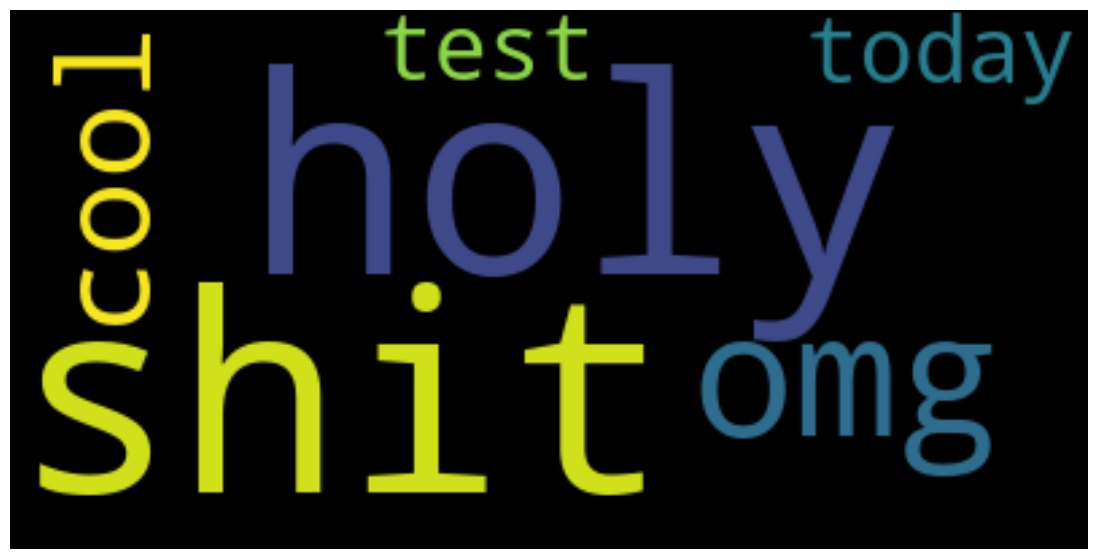

In [13]:
text = 'holy shit omg holy shit omg this is cool what are you doing today this is a test'
wordcloud = WordCloud().generate(text)
#Display the generated image
plt.imshow(wordcloud, interpolation="bilinear")
# plt.figure(figsize=[8,10])
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

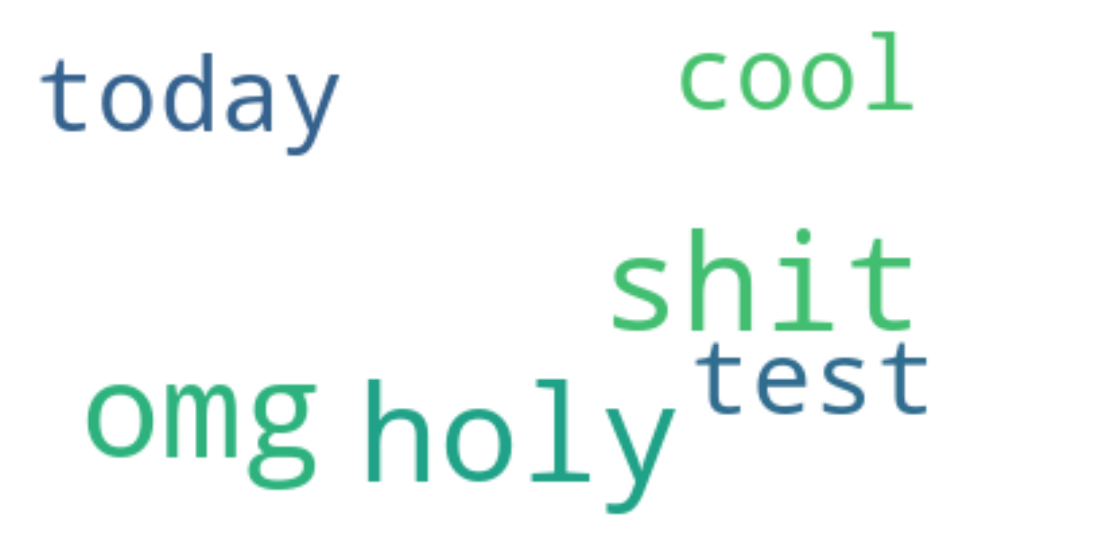

In [15]:
#change font_size, max_word and background_color
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
#Display the image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [215]:
wordcloud.words_

{"read' more'": 1.0,
 "more' aapl'": 0.33761099731874666,
 "aapl' apple'": 0.28345744331448297,
 "amzn' googl'": 0.26203428899014086,
 "more' msft'": 0.2590962563970882,
 "aapl' amzn'": 0.24781289748535462,
 "fb' amzn'": 0.23091622426982128,
 "amzn' aapl'": 0.21336565965400486,
 "more' goog'": 0.20673418568127125,
 "tsla' aapl'": 0.18902537337497538,
 "aapl' goog'": 0.18601269564490414,
 "aapl' tsla'": 0.18431675813184123,
 "goog' googl'": 0.17786144668247153,
 "like' aapl'": 0.1752190088320126,
 "aapl' nflx'": 0.17482786831403507,
 "stock' like'": 0.17005356535032456,
 "amzn' nflx'": 0.1640909118052777,
 "fb' aapl'": 0.1630787237473053,
 "aapl' f'": 0.16182169963991186,
 "make' sure'": 0.16180079900154665,
 "f' s'": 0.15746242363802482,
 "well' get'": 0.1574415229996596,
 "aapl' fb'": 0.15739673591744846,
 "s' free'": 0.15726834628177644,
 "free' make'": 0.1570324676487976,
 "robinhoodapp' well'": 0.15528577144256206,
 "join' robinhoodapp'": 0.15516335341785154,
 "sure' use'": 0.15509

,words,counts
0,aapl,1698955
1,tsla,1161402
2,amzn,990392
3,goog,569944
4,…,569210
...,...,...
1055777,pagasa,1
1055778,zeynepsu,1
1055779,associatespune,1
1055780,uxu…,1


In [ ]:
list(tweet_counts)